<a href="https://colab.research.google.com/github/juan-jm90/Analise_grupo_de_estudos/blob/main/Analise_grupo_de_estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados do Sistema Educacional Brasileiro (SEB)

<br> Quantidade de alunos estrangeiros por nacionalidade
[Dados disponível em](https://dados.educacao.sp.gov.br/dataset/quantidade-de-alunos-estrangeiros-por-nacionalidade)

<br>O banco de dados de Alunos Estrangeiros por Nacionalidade apresenta o número de alunos estrangeiros matriculados em todas as redes de ensino do Estado, por nacionalidade.

<br>Grupo de Estudo | Dados | Toti Diversidade - Agosto/2023

#Importando Bibliotecas

In [ ]:
#Importing depending libraries to read csv files
from pandas.io.parsers.readers import read_csv
import pandas as pd
import matplotlib.pyplot as plt #para fazer os gráficos
from sklearn.preprocessing import LabelEncoder

#Importando Dados

In [ ]:
## Dataset is now stored in a Pandas Dataframe

url_2019_1 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/VW_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_20190517.csv'

url_2020_1 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/VW_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_31012020.csv'

url_2020_2 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/VW_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_31122020.csv'

url_2021_1 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/VW_MENSAL_ALUNOS_ESTRANGEIROS_POR_NACIONALIDADE_31032021.csv'

url_2021_2 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/Estrangeiros_por_nacionalidade_2021_2.csv'

url_2022_1 = 'https://raw.githubusercontent.com/juan-jm90/Analise_grupo_de_estudos/main/Estrangeiros_por_nacionalidade_2022_1.csv'


In [ ]:
#Reading the files uploades with the read csv methods
df_2019_1 = pd.read_csv(url_2019_1, encoding='utf-8', sep=";")
df_2020_1 = pd.read_csv(url_2020_1, encoding='utf-8', sep=";")
df_2020_2 = pd.read_csv(url_2020_2,  encoding='utf-8', sep=";")
df_2021_1 = pd.read_csv(url_2021_1,  encoding='utf-8', sep=";")
df_2021_2 = pd.read_csv(url_2021_2,  encoding='latin-1', sep=";")
df_2022_1 = pd.read_csv(url_2022_1,  encoding='latin-1', sep=";")

In [ ]:
df_2019_1

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº alunos
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,1
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,1
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,1
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,1
...,...,...,...,...,...,...,...,...,...
9005,PRIVADA,TAUBATE,CACAPAVA,CACAPAVA,0,196848,RISCO MAGICO NUCLEO EDUCACIONAL,Portugal,1
9006,PRIVADA,TAUBATE,TAUBATE,TAUBATE,0,111235,SAO LUIS ESCOLA EDUCACAO INFANTIL ENSINO FUNDA...,Portugal,2
9007,PRIVADA,VOTORANTIM,ARACOIABA DA SERRA,ARACOIABA DA SERRA,0,160349,MAGNA VIDA ESCOLA,Cuba,1
9008,PRIVADA,VOTORANTIM,CAPELA DO ALTO,CAPELA DO ALTO,0,363960,CENTRO EDUCACIONAL CAPELA DO ALTO,Japão,1


In [ ]:
df_2020_1

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,APIAI,APIAI,APIAI,11,564916,ETEC DE APIAI,Espanha,1
1,ESTADUAL - OUTROS,LIMEIRA,LIMEIRA,LIMEIRA,27,45950,LIMEIRA COLEGIO TECNICO DE UNICAMP,Japão,2
2,ESTADUAL - OUTROS,LIMEIRA,LIMEIRA,LIMEIRA,27,45950,LIMEIRA COLEGIO TECNICO DE UNICAMP,Reino Unido da Grã-Bretanha e Irlanda do Norte,2
3,ESTADUAL - OUTROS,REGISTRO,REGISTRO,REGISTRO,11,444728,REGISTRO ETEC DE,Japão,2
4,ESTADUAL - OUTROS,SUL 1,VILA ANDRADE,SAO PAULO,11,440620,ABDIAS DO NASCIMENTO ETEC,Argentina,1
...,...,...,...,...,...,...,...,...,...
9195,PRIVADA,VOTORANTIM,SALTO DE PIRAPORA,SALTO DE PIRAPORA,0,155767,ANGLO SALTO DE PIRAPORA,Estados Unidos da América,1
9196,PRIVADA,VOTORANTIM,SALTO DE PIRAPORA,SALTO DE PIRAPORA,0,155767,ANGLO SALTO DE PIRAPORA,Japão,2
9197,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,0,143443,ANTENOR THOMAZI COLEGIO CRISTAO,Paraguai,1
9198,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,0,159918,DIMENSAO CRIANCA E CIA COLEGIO,Espanha,1


In [ ]:
df_2020_2

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31082,EUDECIO LUIZ VICENTE PROF ETEC,Japão,1
1,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31100,HERVAL BELLUSCI ENGENHEIRO ETEC,Paraguai,2
2,ESTADUAL - OUTROS,ADAMANTINA,OSVALDO CRUZ,OSVALDO CRUZ,11,915865,AMIM JUNDI ETEC,Japão,1
3,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,Bolívia,3
4,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,China,1
...,...,...,...,...,...,...,...,...,...
12659,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,3
12660,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,1
12661,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,123389,DINAMICA ESCOLA EDUCACAO BASICA DE VOTUPORANGA,Bolívia,1
12662,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,1


In [ ]:
df_2021_1

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31100,HERVAL BELLUSCI ENGENHEIRO ETEC,Paraguai,1
1,ESTADUAL - OUTROS,ADAMANTINA,OSVALDO CRUZ,OSVALDO CRUZ,11,915865,AMIM JUNDI ETEC,Japão,1
2,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,Bolívia,1
3,ESTADUAL - OUTROS,AMERICANA,SANTA BARBARA D'OESTE,SANTA BARBARA D'OESTE,11,925950,JOSE DAGNONI DR PROF ETEC,Haiti,1
4,ESTADUAL - OUTROS,AMERICANA,SANTA BARBARA D'OESTE,SANTA BARBARA D'OESTE,11,925950,JOSE DAGNONI DR PROF ETEC,Marrocos,1
...,...,...,...,...,...,...,...,...,...
12444,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,14,111880,SESI 023 CENTRO EDUCACIONAL,Portugal,2
12445,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,3
12446,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,1
12447,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,1


In [ ]:
df_2021_2

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Japão,1
1,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Síria,3
2,ESTADUAL - SE,LINS,LINS,LINS,8,26189,21 DE ABRIL,Venezuela,3
3,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,8,18533,31 DE MARCO,Chile,1
4,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,8,18533,31 DE MARCO,"Dominicana, República",2
...,...,...,...,...,...,...,...,...,...
13416,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Bolívia,2
13417,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Colômbia,1
13418,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Angola,1
13419,ESTADUAL - OUTROS,LESTE 4,ARTUR ALVIM,SAO PAULO,11,925871,ZONA LESTE ETEC,Bolívia,3


In [ ]:
df_2022_1

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - SE,SANTO ANDRE,SANTO ANDRE,SANTO ANDRE,8,923370,16 DE JULHO,Japão,1
1,ESTADUAL - SE,SANTO ANASTACIO,PRESIDENTE EPITACIO,PRESIDENTE EPITACIO,8,32220,18 DE JUNHO,Paraguai,1
2,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Estados Unidos da América,1
3,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Síria,1
4,ESTADUAL - SE,LINS,LINS,LINS,8,26189,21 DE ABRIL,Venezuela,1
...,...,...,...,...,...,...,...,...,...
13825,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Colômbia,1
13826,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Angola,1
13827,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Bolívia,1
13828,ESTADUAL - OUTROS,LESTE 4,ARTUR ALVIM,SAO PAULO,11,925871,ZONA LESTE ETEC,Bolívia,3


In [ ]:
#open all tables
display(df_2019_1)
display(df_2020_1)
display(df_2020_2)
display(df_2021_1)
display(df_2021_2)
display(df_2022_1)

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº alunos
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,1
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,1
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,1
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,1
...,...,...,...,...,...,...,...,...,...
9005,PRIVADA,TAUBATE,CACAPAVA,CACAPAVA,0,196848,RISCO MAGICO NUCLEO EDUCACIONAL,Portugal,1
9006,PRIVADA,TAUBATE,TAUBATE,TAUBATE,0,111235,SAO LUIS ESCOLA EDUCACAO INFANTIL ENSINO FUNDA...,Portugal,2
9007,PRIVADA,VOTORANTIM,ARACOIABA DA SERRA,ARACOIABA DA SERRA,0,160349,MAGNA VIDA ESCOLA,Cuba,1
9008,PRIVADA,VOTORANTIM,CAPELA DO ALTO,CAPELA DO ALTO,0,363960,CENTRO EDUCACIONAL CAPELA DO ALTO,Japão,1


,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,APIAI,APIAI,APIAI,11,564916,ETEC DE APIAI,Espanha,1
1,ESTADUAL - OUTROS,LIMEIRA,LIMEIRA,LIMEIRA,27,45950,LIMEIRA COLEGIO TECNICO DE UNICAMP,Japão,2
2,ESTADUAL - OUTROS,LIMEIRA,LIMEIRA,LIMEIRA,27,45950,LIMEIRA COLEGIO TECNICO DE UNICAMP,Reino Unido da Grã-Bretanha e Irlanda do Norte,2
3,ESTADUAL - OUTROS,REGISTRO,REGISTRO,REGISTRO,11,444728,REGISTRO ETEC DE,Japão,2
4,ESTADUAL - OUTROS,SUL 1,VILA ANDRADE,SAO PAULO,11,440620,ABDIAS DO NASCIMENTO ETEC,Argentina,1
...,...,...,...,...,...,...,...,...,...
9195,PRIVADA,VOTORANTIM,SALTO DE PIRAPORA,SALTO DE PIRAPORA,0,155767,ANGLO SALTO DE PIRAPORA,Estados Unidos da América,1
9196,PRIVADA,VOTORANTIM,SALTO DE PIRAPORA,SALTO DE PIRAPORA,0,155767,ANGLO SALTO DE PIRAPORA,Japão,2
9197,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,0,143443,ANTENOR THOMAZI COLEGIO CRISTAO,Paraguai,1
9198,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,0,159918,DIMENSAO CRIANCA E CIA COLEGIO,Espanha,1


,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31082,EUDECIO LUIZ VICENTE PROF ETEC,Japão,1
1,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31100,HERVAL BELLUSCI ENGENHEIRO ETEC,Paraguai,2
2,ESTADUAL - OUTROS,ADAMANTINA,OSVALDO CRUZ,OSVALDO CRUZ,11,915865,AMIM JUNDI ETEC,Japão,1
3,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,Bolívia,3
4,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,China,1
...,...,...,...,...,...,...,...,...,...
12659,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,3
12660,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,1
12661,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,123389,DINAMICA ESCOLA EDUCACAO BASICA DE VOTUPORANGA,Bolívia,1
12662,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,1


,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,ADAMANTINA,ADAMANTINA,ADAMANTINA,11,31100,HERVAL BELLUSCI ENGENHEIRO ETEC,Paraguai,1
1,ESTADUAL - OUTROS,ADAMANTINA,OSVALDO CRUZ,OSVALDO CRUZ,11,915865,AMIM JUNDI ETEC,Japão,1
2,ESTADUAL - OUTROS,AMERICANA,AMERICANA,AMERICANA,11,45962,POLIVALENTE DE AMERICANA ETEC,Bolívia,1
3,ESTADUAL - OUTROS,AMERICANA,SANTA BARBARA D'OESTE,SANTA BARBARA D'OESTE,11,925950,JOSE DAGNONI DR PROF ETEC,Haiti,1
4,ESTADUAL - OUTROS,AMERICANA,SANTA BARBARA D'OESTE,SANTA BARBARA D'OESTE,11,925950,JOSE DAGNONI DR PROF ETEC,Marrocos,1
...,...,...,...,...,...,...,...,...,...
12444,PRIVADA,VOTORANTIM,VOTORANTIM,VOTORANTIM,14,111880,SESI 023 CENTRO EDUCACIONAL,Portugal,2
12445,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116497,ADVENTISTA DE VOTUPORANGA COLEGIO,Japão,3
12446,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,0,116506,VOTUPORANGUENSE DE ENSINO ESCOLA,Japão,1
12447,PRIVADA,VOTUPORANGA,VOTUPORANGA,VOTUPORANGA,40,269001,IRMA ELVIRA CENTRO DE EDUCACAO INFANTIL,Venezuela,1


,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Japão,1
1,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Síria,3
2,ESTADUAL - SE,LINS,LINS,LINS,8,26189,21 DE ABRIL,Venezuela,3
3,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,8,18533,31 DE MARCO,Chile,1
4,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,8,18533,31 DE MARCO,"Dominicana, República",2
...,...,...,...,...,...,...,...,...,...
13416,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Bolívia,2
13417,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Colômbia,1
13418,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Angola,1
13419,ESTADUAL - OUTROS,LESTE 4,ARTUR ALVIM,SAO PAULO,11,925871,ZONA LESTE ETEC,Bolívia,3


,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - SE,SANTO ANDRE,SANTO ANDRE,SANTO ANDRE,8,923370,16 DE JULHO,Japão,1
1,ESTADUAL - SE,SANTO ANASTACIO,PRESIDENTE EPITACIO,PRESIDENTE EPITACIO,8,32220,18 DE JUNHO,Paraguai,1
2,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Estados Unidos da América,1
3,ESTADUAL - SE,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,SAO BERNARDO DO CAMPO,8,9283,20 DE AGOSTO,Síria,1
4,ESTADUAL - SE,LINS,LINS,LINS,8,26189,21 DE ABRIL,Venezuela,1
...,...,...,...,...,...,...,...,...,...
13825,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Colômbia,1
13826,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Angola,1
13827,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Bolívia,1
13828,ESTADUAL - OUTROS,LESTE 4,ARTUR ALVIM,SAO PAULO,11,925871,ZONA LESTE ETEC,Bolívia,3


#Tratando os dados

In [ ]:
#changing in table df_2019_1 the column name "N° alunos" para "N° ALUNOS"
df_2019_1_ren = df_2019_1.rename(columns={"Nº alunos":"Nº ALUNOS"})

In [ ]:
df_2019_1_ren

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,1
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,1
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,1
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,1
...,...,...,...,...,...,...,...,...,...
9005,PRIVADA,TAUBATE,CACAPAVA,CACAPAVA,0,196848,RISCO MAGICO NUCLEO EDUCACIONAL,Portugal,1
9006,PRIVADA,TAUBATE,TAUBATE,TAUBATE,0,111235,SAO LUIS ESCOLA EDUCACAO INFANTIL ENSINO FUNDA...,Portugal,2
9007,PRIVADA,VOTORANTIM,ARACOIABA DA SERRA,ARACOIABA DA SERRA,0,160349,MAGNA VIDA ESCOLA,Cuba,1
9008,PRIVADA,VOTORANTIM,CAPELA DO ALTO,CAPELA DO ALTO,0,363960,CENTRO EDUCACIONAL CAPELA DO ALTO,Japão,1


In [ ]:
#Adicionando o ano nas tabelas
df_2019_1_ano = df_2019_1_ren.assign(ANO= 2019)
df_2020_1_ano = df_2020_1.assign(ANO= 2020)
df_2020_2_ano = df_2020_2.assign(ANO= 2020)
df_2021_1_ano = df_2021_1.assign(ANO= 2021)
df_2021_2_ano = df_2021_2.assign(ANO= 2021)
df_2022_1_ano = df_2022_1.assign(ANO= 2022)

In [ ]:
#Concatenar tabelas
lista_tabelas = [df_2019_1_ano, df_2020_1_ano, df_2020_2_ano, df_2021_1_ano, df_2021_2_ano, df_2022_1_ano]
tabela_todos = pd.concat(lista_tabelas)

In [ ]:
display(tabela_todos)

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS,ANO
0,ESTADUAL - OUTROS,CAMPINAS LESTE,CAMPINAS LESTE,CAMPINAS,27,45949,CAMPINAS COLEGIO TECNICO DE - UNICAMP,França,1,2019
1,ESTADUAL - OUTROS,CENTRO OESTE,RAPOSO TAVARES,SAO PAULO,11,438820,RAPOSO TAVARES ETEC,Argentina,1,2019
2,ESTADUAL - OUTROS,CENTRO SUL,BELA VISTA,SAO PAULO,11,299364,MARIA AUGUSTA SARAIVA DRA ETEC,Bolívia,2,2019
3,ESTADUAL - OUTROS,SOROCABA,SOROCABA,SOROCABA,11,16354,RUBENS DE FARIA E SOUZA ETEC,Peru,1,2019
4,ESTADUAL - OUTROS,TAUBATE,CACAPAVA,CACAPAVA,11,14308,MACHADO DE ASSIS ETEC,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...
13825,ESTADUAL - OUTROS,JUNDIAI,JUNDIAI,JUNDIAI,11,45986,VASCO ANTONIO VENCHIARUTTI ETEC,Colômbia,1,2022
13826,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Angola,1,2022
13827,ESTADUAL - OUTROS,LESTE 5,ARICANDUVA,SAO PAULO,11,405243,VILA FORMOSA ETEC DE,Bolívia,1,2022
13828,ESTADUAL - OUTROS,LESTE 4,ARTUR ALVIM,SAO PAULO,11,925871,ZONA LESTE ETEC,Bolívia,3,2022


In [ ]:
#Trocando as maiúsculas
dados = tabela_todos.applymap(lambda s:s.lower().capitalize() if type(s) == str else s)
dados

,NOMEDEP,DE,DISTR,MUN,TIPOESC,COD_ESC,NOMESC,DS_PAIS,Nº ALUNOS,ANO
0,Estadual - outros,Campinas leste,Campinas leste,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,Estadual - outros,Centro oeste,Raposo tavares,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,Estadual - outros,Centro sul,Bela vista,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,Estadual - outros,Sorocaba,Sorocaba,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,Estadual - outros,Taubate,Cacapava,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...
13825,Estadual - outros,Jundiai,Jundiai,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,Estadual - outros,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,Estadual - outros,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,Estadual - outros,Leste 4,Artur alvim,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


In [ ]:
#Usando o DIC para renomear as columnas
dados.rename(columns={'NOMEDEP': 'Clasificaçõ','DE': 'Dependência','DISTR': 'Distrito','MUN': 'Município','TIPOESC': 'Tipo da Escola','COD_ESC': 'Código da Escola','NOMESC': 'Nome Escola','DS_PAIS': 'País de Origem','Nº ALUNOS': 'Número de alunos','ANO': 'Ano'}, inplace=True)
dados

,Clasificaçõ,Dependência,Distrito,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
0,Estadual - outros,Campinas leste,Campinas leste,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,Estadual - outros,Centro oeste,Raposo tavares,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,Estadual - outros,Centro sul,Bela vista,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,Estadual - outros,Sorocaba,Sorocaba,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,Estadual - outros,Taubate,Cacapava,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...
13825,Estadual - outros,Jundiai,Jundiai,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,Estadual - outros,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,Estadual - outros,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,Estadual - outros,Leste 4,Artur alvim,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


In [ ]:
#Conhecendo os dados
print('Clasificaçõ')
dados['Clasificaçõ'].value_counts()

Clasificaçõ


Estadual - se        30631
Municipal            20378
Privada              18545
Estadual - outros     1013
Federal                  7
Name: Clasificaçõ, dtype: int64

In [ ]:
#O sistema se classifica em Estadual, Municipal, Privada e Federal, vamos a remplazar
dados['Clasificaçõ'] = dados['Clasificaçõ'].str.replace('Estadual - se', 'Estadual')
dados['Clasificaçõ'] = dados['Clasificaçõ'].str.replace('Estadual - outros', 'Estadual')
print('Clasificaçõ')
dados['Clasificaçõ'].value_counts()

Clasificaçõ


Estadual     31644
Municipal    20378
Privada      18545
Federal          7
Name: Clasificaçõ, dtype: int64

In [ ]:
print('País de Origem')
dados['País de Origem'].value_counts()

País de Origem


Venezuela    10843
Bolívia       9941
Japão         7626
Haiti         6339
Colômbia      3628
             ...  
Sri lanka        1
Etiópia          1
Botswana         1
Fiji             1
Kuwait           1
Name: País de Origem, Length: 188, dtype: int64

In [ ]:
#Verificando não ter campos vazios, se retorna true tem campos vazios nessa columna
#Testar para c/columna
dados['Clasificaçõ'].isna().any()

False

In [ ]:
print(f"Quantidades de registros \n{len(dados)} \n")
print(f"Estatísticas geral dos dados \n\n")
dados.describe(include='all').head()

Quantidades de registros 
70574 

Estatísticas geral dos dados 




,Clasificaçõ,Dependência,Distrito,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
count,70574,70574,70574,70574,70574.000000,70574.000000,70574,70574,70574.000000,70574.000000
unique,4,92,647,482,NaN,NaN,12317,188,NaN,NaN
top,Estadual,Centro,Sorocaba,Sao paulo,NaN,NaN,Penitenciaria cabo p m marcelo pires da silva,Venezuela,NaN,NaN
freq,31644,3358,1636,24065,NaN,NaN,176,10843,NaN,NaN
mean,NaN,NaN,NaN,NaN,5.504152,232835.418794,NaN,NaN,2.076105,2020.630827


In [ ]:
dados

,Clasificaçõ,Dependência,Distrito,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
0,Estadual,Campinas leste,Campinas leste,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,Estadual,Centro oeste,Raposo tavares,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,Estadual,Centro sul,Bela vista,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,Estadual,Sorocaba,Sorocaba,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,Estadual,Taubate,Cacapava,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...
13825,Estadual,Jundiai,Jundiai,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,Estadual,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,Estadual,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,Estadual,Leste 4,Artur alvim,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


#Normalizando as tabelas da Base de Dados

In [ ]:
#Criando novas columnas para os codigos usando labelEncoder
#Para normalizar as tabelas da BD
dadosBD = dados
convertidor = LabelEncoder()

In [ ]:
dadosBD.insert(0, 'Cod Cla', None)
dadosBD['Cod Cla'] = convertidor.fit_transform(dadosBD['Clasificaçõ'])
dadosBD

In [ ]:
dadosBD.insert(2, 'Cod Dep', None)
dadosBD['Cod Dep'] = convertidor.fit_transform(dadosBD['Dependência'])
dadosBD

,Cod Cla,Clasificaçõ,Cod Dep,Dependência,Distrito,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
0,0,Estadual,14,Campinas leste,Campinas leste,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,0,Estadual,21,Centro oeste,Raposo tavares,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,0,Estadual,22,Centro sul,Bela vista,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,0,Estadual,80,Sorocaba,Sorocaba,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,0,Estadual,88,Taubate,Cacapava,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
13825,0,Estadual,41,Jundiai,Jundiai,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,0,Estadual,46,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,0,Estadual,46,Leste 5,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,0,Estadual,45,Leste 4,Artur alvim,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


In [ ]:
dadosBD.insert(4, 'Cod Dist', None)
dadosBD['Cod Dist'] = convertidor.fit_transform(dadosBD['Distrito'])
dadosBD

,Cod Cla,Clasificaçõ,Cod Dep,Dependência,Cod Dist,Distrito,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
0,0,Estadual,14,Campinas leste,111,Campinas leste,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,0,Estadual,21,Centro oeste,479,Raposo tavares,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,0,Estadual,22,Centro sul,66,Bela vista,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,0,Estadual,80,Sorocaba,581,Sorocaba,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,0,Estadual,88,Taubate,97,Cacapava,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13825,0,Estadual,41,Jundiai,309,Jundiai,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,0,Estadual,46,Leste 5,38,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,0,Estadual,46,Leste 5,38,Aricanduva,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,0,Estadual,45,Leste 4,40,Artur alvim,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


In [ ]:
dadosBD.insert(6, 'Cod Mun', None)
dadosBD['Cod Mun'] = convertidor.fit_transform(dadosBD['Município'])
dadosBD

,Cod Cla,Clasificaçõ,Cod Dep,Dependência,Cod Dist,Distrito,Cod Mun,Município,Tipo da Escola,Código da Escola,Nome Escola,País de Origem,Número de alunos,Ano
0,0,Estadual,14,Campinas leste,111,Campinas leste,86,Campinas,27,45949,Campinas colegio tecnico de - unicamp,França,1,2019
1,0,Estadual,21,Centro oeste,479,Raposo tavares,426,Sao paulo,11,438820,Raposo tavares etec,Argentina,1,2019
2,0,Estadual,22,Centro sul,66,Bela vista,426,Sao paulo,11,299364,Maria augusta saraiva dra etec,Bolívia,2,2019
3,0,Estadual,80,Sorocaba,581,Sorocaba,442,Sorocaba,11,16354,Rubens de faria e souza etec,Peru,1,2019
4,0,Estadual,88,Taubate,97,Cacapava,75,Cacapava,11,14308,Machado de assis etec,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13825,0,Estadual,41,Jundiai,309,Jundiai,232,Jundiai,11,45986,Vasco antonio venchiarutti etec,Colômbia,1,2022
13826,0,Estadual,46,Leste 5,38,Aricanduva,426,Sao paulo,11,405243,Vila formosa etec de,Angola,1,2022
13827,0,Estadual,46,Leste 5,38,Aricanduva,426,Sao paulo,11,405243,Vila formosa etec de,Bolívia,1,2022
13828,0,Estadual,45,Leste 4,40,Artur alvim,426,Sao paulo,11,925871,Zona leste etec,Bolívia,3,2022


In [ ]:
dadosBD.insert(11, 'Cod País', None)
dadosBD['Cod País'] = convertidor.fit_transform(dadosBD['País de Origem'])
dadosBD

,Cod Cla,Clasificaçõ,Cod Dep,Dependência,Cod Dist,Distrito,Cod Mun,Município,Tipo da Escola,Código da Escola,Nome Escola,Cod País,País de Origem,Número de alunos,Ano
0,0,Estadual,14,Campinas leste,111,Campinas leste,86,Campinas,27,45949,Campinas colegio tecnico de - unicamp,69,França,1,2019
1,0,Estadual,21,Centro oeste,479,Raposo tavares,426,Sao paulo,11,438820,Raposo tavares etec,6,Argentina,1,2019
2,0,Estadual,22,Centro sul,66,Bela vista,426,Sao paulo,11,299364,Maria augusta saraiva dra etec,20,Bolívia,2,2019
3,0,Estadual,80,Sorocaba,581,Sorocaba,442,Sorocaba,11,16354,Rubens de faria e souza etec,140,Peru,1,2019
4,0,Estadual,88,Taubate,97,Cacapava,75,Cacapava,11,14308,Machado de assis etec,144,Portugal,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13825,0,Estadual,41,Jundiai,309,Jundiai,232,Jundiai,11,45986,Vasco antonio venchiarutti etec,42,Colômbia,1,2022
13826,0,Estadual,46,Leste 5,38,Aricanduva,426,Sao paulo,11,405243,Vila formosa etec de,4,Angola,1,2022
13827,0,Estadual,46,Leste 5,38,Aricanduva,426,Sao paulo,11,405243,Vila formosa etec de,20,Bolívia,1,2022
13828,0,Estadual,45,Leste 4,40,Artur alvim,426,Sao paulo,11,925871,Zona leste etec,20,Bolívia,3,2022


In [ ]:
#Ver 5 registros aleatórios
dadosBD.sample(5)

,Cod Cla,Clasificaçõ,Cod Dep,Dependência,Cod Dist,Distrito,Cod Mun,Município,Tipo da Escola,Código da Escola,Nome Escola,Cod País,País de Origem,Número de alunos,Ano
5291,0,Estadual,86,Taboao da serra,586,Taboao da serra,446,Taboao da serra,8,10248,Joao caly professor,42,Colômbia,1,2021
11919,3,Privada,15,Campinas oeste,642,Vinhedo,477,Vinhedo,0,518785,Objetivo vinhedo centro educacional,96,Japão,1,2021
7097,2,Municipal,48,Lins,326,Lins,241,Lins,0,566652,Mae comerciaria emei da,179,Venezuela,1,2020
3936,0,Estadual,57,Osasco,396,Osasco,298,Osasco,8,904740,Fernando buonaduce professor,20,Bolívia,4,2020
10299,3,Privada,15,Campinas oeste,621,Valinhos,471,Valinhos,40,136025,Colegio visconde de porto seguro campus valinhos,40,China,1,2021


#Separando as Tabelas

In [ ]:
#Tabela fato
escolaestrageiros=dadosBD[['Cod Cla','Cod Dep','Cod Dist','Cod Mun','Código da Escola','Cod País','Número de alunos','Ano']]


#Tabelas dimensôes
clasificacao=dadosBD[['Cod Cla','Clasificaçõ']]
clasificacao = clasificacao.value_counts()
dependencia=dadosBD[['Cod Dep','Dependência']]
dependencia = dependencia.value_counts()
distrito=dadosBD[['Cod Dist','Distrito']]
distrito = distrito.value_counts()
municipio=dadosBD[['Cod Mun','Município']]
municipio = municipio.value_counts()
escola=dadosBD[['Código da Escola','Nome Escola','Tipo da Escola']]
escola = escola.value_counts()
pais=dadosBD[['Cod País','País de Origem']]
pais = pais.value_counts()

In [ ]:
print(f"Quantidades de registros na tabela fato \n{len(escolaestrageiros)} \n")
print(f"Quantidades de registros na tabela Clasificação \n{len(clasificacao)} \n")
print(f"Quantidades de registros na tabela dependencia\n{len(dependencia)} \n")
print(f"Quantidades de registros na tabela distrito\n{len(distrito)} \n")
print(f"Quantidades de registros na tabela municipio\n{len(municipio)} \n")
print(f"Quantidades de registros na tabela escola\n{len(escola)} \n")
print(f"Quantidades de registros na tabela país\n{len(pais)} \n")

Quantidades de registros na tabela fato 
70574 

Quantidades de registros na tabela Clasificação 
4 

Quantidades de registros na tabela dependencia
92 

Quantidades de registros na tabela distrito
647 

Quantidades de registros na tabela municipio
482 

Quantidades de registros na tabela escola
12525 

Quantidades de registros na tabela país
188 



#Exportanto Dados

In [ ]:
#Todo
#dadosBD.to_csv('BDEducacao.csv')

#Fato
#dadosBD.to_csv('dadosBD.csv')
escolaestrageiros.to_csv('escolaestrageiros.csv')

#Dimensões
clasificacao.to_csv('clasificacao.csv')
dependencia.to_csv('dependencia.csv')
distrito.to_csv('distrito.csv')
municipio.to_csv('municipio.csv')
escola.to_csv('escola.csv')
pais.to_csv('pais.csv')

In [ ]:
#Fazer o download da tabela concatenada
from google.colab import files
tabela_todos.to_csv('tabela_todos.csv')
files.download('tabela_todos.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Gráficos

<BarContainer object of 9010 artists>

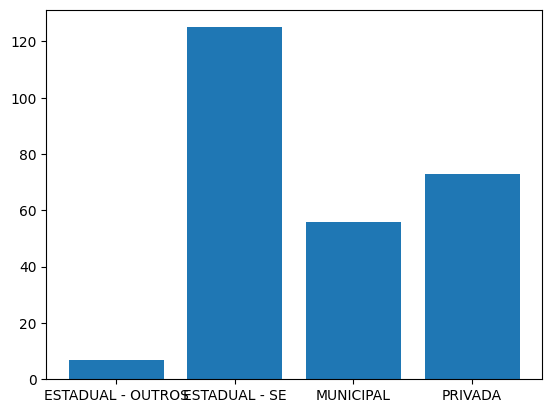

In [ ]:
#Gráficos
plt.bar(df_2019_1_ano['NOMEDEP'], df_2019_1_ano['Nº ALUNOS'])

<BarContainer object of 70574 artists>

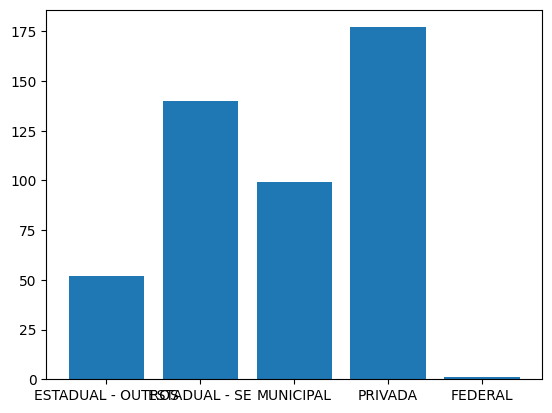

In [ ]:
plt.bar(tabela_todos['NOMEDEP'], tabela_todos['Nº ALUNOS'])

<BarContainer object of 70574 artists>

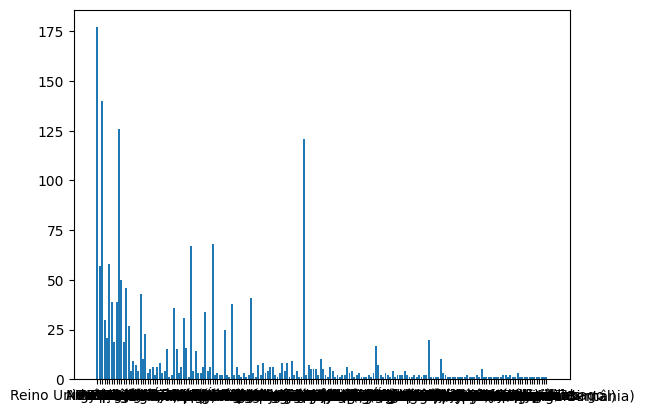

In [ ]:
plt.bar(tabela_todos['DS_PAIS'], tabela_todos['Nº ALUNOS'])

<BarContainer object of 9010 artists>

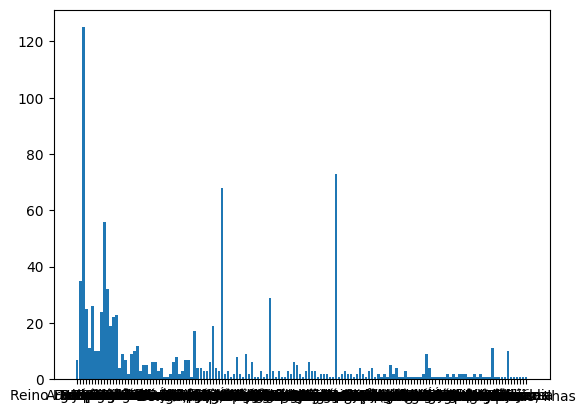

In [ ]:
plt.bar(df_2019_1_ano['DS_PAIS'], df_2019_1_ano['Nº ALUNOS'])